# Ch14 数据分析示例  Data Analysis Examples

## 14.1 从bitly获取usa.gov数据 Bitly Data from 1.USA.gov

In [306]:
#思路：想找counts time zone细分，发现缺失值和空字符串，重命名，count，可视化

In [307]:
path = r'C:\Users\miran\lpthw\example.txt'
open(path).readline()
import json
path = r'C:\Users\miran\lpthw\example.txt'
records = [json.loads(line) for line in open(path)]

#records现在是一个python字典的列表：
records[0]
# {'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
#  'c': 'US',
#  'nk': 1,
#  'tz': 'America/New_York',
#  'gr': 'MA',
#  'g': 'A6qOVH',
#  'h': 'wfLQtf',
#  'l': 'orofrog',
#  'al': 'en-US,en;q=0.8',
#  'hh': '1.usa.gov',
#  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
#  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
#  't': 1331923247,
#  'hc': 1331822918,
#  'cy': 'Danvers',
#  'll': [42.576698, -70.954903]}

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### 14.1.1 纯python时区计数 Counting Time Zones in Pure Python

In [308]:
#在Python中，"rec" 是一个通常用作迭代变量的名称，表示"record"，即记录或数据项。
#它在循环中被用来代表正在处理的每个元素或数据项。
#"rec" 是一个短小的名称，可根据上下文的语义选择更具描述性的名称。
#在示例代码中，"rec" 代表记录列表中的每个字典项。

In [309]:
#假设想要找到数据集中，最长出现的时区（tz字段）。可以使用列表再次提取时区列表：

#time_zones = [rec['tz'] for rec in records]
#会报错
# KeyError                                  Traceback (most recent call last)
# KeyError: 'tz'

#代码意义：从记录中提取出所有具有时区信息的值，并存储在time_zones列表中
#for rec in records: 对于记录列表中的每个记录（字典），执行以下操作。
#rec['tz']: 如果存在键名为'tz'的键，则取出其对应的值。
#代码中使用了条件语句if 'tz' in rec来检查记录是否包含'tz'键，以避免在不存在'tz'键的情况下出现KeyError错误。
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

#代码意义：获取"time_zones"列表的前10个元素。
time_zones[:10]
# ['America/New_York',
#  'America/Denver',
#  'America/New_York',
#  'America/Sao_Paulo',
#  'America/New_York',
#  'America/New_York',
#  'Europe/Warsaw',
#  '',
#  '',
#  '']

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [310]:
#只看前10个时区，可以看到其中一些是未知的空字符串。
#也可以过滤掉这些，但现在暂时把他们留下。
#为了按时区生成计数，将展示2中方法(python标准库【难】，pandas【简单】)
#计数的方法是在遍历时区时，使用字典来存储计数。


# 代码意义：计算序列中每个元素的出现次数，并以字典形式返回结果。

# 定义了一个函数get_counts(sequence)，该函数接受一个序列作为参数，并返回一个字典，其中包含序列中每个元素的计数。

# 函数通过遍历序列中的每个元素，并在字典counts中记录每个元素出现的次数。
# 如果元素已经在counts字典中存在，则将其计数加1；否则，将该元素添加到字典中，并将其计数设置为1。
# 最后，函数返回包含元素计数的字典counts。

def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [311]:
#使用更多python标准库中的高级工具，可以更简明写出同样东西：
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)                 #值会初始化
    for x in sequence:
        counts[x] += 1
    return counts

# 这段代码定义了一个函数get_counts2(sequence)，该函数接受一个序列作为参数，并返回一个字典，其中包含序列中每个元素的计数。
# 函数使用collections模块中的defaultdict类来创建一个默认值为0的字典counts。这意味着当访问字典中不存在的键时，会返回默认值0，而不会引发KeyError异常。
# 函数通过遍历序列中的每个元素，并将元素作为键来增加字典counts中对应键的值。如果元素在字典中不存在，则默认值0会被加上1，实现计数的功能。
# 最后，函数返回包含元素计数的字典counts。
# 这个函数与之前的get_counts函数相同，但使用了defaultdict来简化代码，避免了检查键是否存在的步骤。


counts = get_counts2(time_zones)
counts
# defaultdict(int,
#             {'America/New_York': 1251,
#              'America/Denver': 191,
#              'America/Sao_Paulo': 33,
#              'Europe/Warsaw': 16,
# ...
#              'Asia/Jakarta': 3,
#              'America/Tegucigalpa': 1})  

counts['America/New_York']
#1251

len(time_zones)
#3440

3440

In [312]:
#逻辑放在一个函数中，使之有更好的可重用性。要在时区上使用，只需传递time_zones列表：
counts = get_counts(time_zones)
counts
# {'America/New_York': 1251,
#  'America/Denver': 191,
#  'America/Sao_Paulo': 33,
#  ...
#  'Africa/Casablanca': 1,
#  'Asia/Jakarta': 3,
#  'America/Tegucigalpa': 1}

counts['America/New_York']
#1251

len(time_zones)
#3440

3440

In [313]:
#如果想要前10的时区和它们的计数，可以做一些字典技巧：

#这段代码定义了一个函数top_counts(count_dict, n=10)，该函数接受一个计数字典和一个可选的参数n（默认值为10）作为输入，并返回计数最高的前n个键值对。

#函数首先使用列表推导式将计数字典中的键值对转换为(count, tz)的形式，其中count是计数值，tz是对应的时区。这样可以将键值对的顺序进行翻转，使得按照计数值进行排序。

#然后，函数使用sort()方法对键值对列表进行排序，默认按照元组的第一个元素（即计数值）进行升序排序。

#最后，函数返回排序后列表的最后n个元素，即计数最高的前n个键值对。

#这个函数可以用于从计数字典中获取计数最高的时区及其对应的计数值，以便进行进一步的分析和展示。

def top_counts(count_dict, n = 10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]
#之后有
top_counts(counts)
# [(33, 'America/Sao_Paulo'),
#  (35, 'Europe/Madrid'),
#  (36, 'Pacific/Honolulu'),
#  (37, 'Asia/Tokyo'),
#  (74, 'Europe/London'),
#  (191, 'America/Denver'),
#  (382, 'America/Los_Angeles'),
#  (400, 'America/Chicago'),
#  (521, ''),
#  (1251, 'America/New_York')]

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [314]:
#python标准库，会发现collections.counter类，可以使任务更加简单：

from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)
# [('America/New_York', 1251),
#  ('', 521),
#  ('America/Chicago', 400),
#  ('America/Los_Angeles', 382),
#  ('America/Denver', 191),
#  ('Europe/London', 74),
#  ('Asia/Tokyo', 37),
#  ('Pacific/Honolulu', 36),
#  ('Europe/Madrid', 35),
#  ('America/Sao_Paulo', 33)]

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### 14.1.2 使用pandas进行时区计数 Counting Time Zones with pandas

In [315]:
#根据原始记录集合生成data frame非常简单，只需要把记录的列表传递给pandas.DataFrame：

import pandas as pd
frame = pd.DataFrame(records)
frame[:5]
# a	c	nk	tz	gr	g	h	l	al	hh	r	u	t	hc	cy	ll	_heartbeat_	kw
# 0	Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...	US	1.0	America/New_York	MA	A6qOVH	wfLQtf	orofrog	en-US,en;q=0.8	1.usa.gov	http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...	http://www.ncbi.nlm.nih.gov/pubmed/22415991	1.331923e+09	1.331823e+09	Danvers	[42.576698, -70.954903]	NaN	NaN
# 1	GoogleMaps/RochesterNY	US	0.0	America/Denver	UT	mwszkS	mwszkS	bitly	NaN	j.mp	http://www.AwareMap.com/	http://www.monroecounty.gov/etc/911/rss.php	1.331923e+09	1.308262e+09	Provo	[40.218102, -111.613297]	NaN	NaN
# 2	Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...	US	1.0	America/New_York	DC	xxr3Qb	xxr3Qb	bitly	en-US	1.usa.gov	http://t.co/03elZC4Q	http://boxer.senate.gov/en/press/releases/0316...	1.331923e+09	1.331920e+09	Washington	[38.9007, -77.043098]	NaN	NaN
# 3	Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...	BR	0.0	America/Sao_Paulo	27	zCaLwp	zUtuOu	alelex88	pt-br	1.usa.gov	direct	http://apod.nasa.gov/apod/ap120312.html	1.331923e+09	1.331923e+09	Braz	[-23.549999, -46.616699]	NaN	NaN
# 4	Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...	US	0.0	America/New_York	MA	9b6kNl	9b6kNl	bitly	en-US,en;q=0.8	bit.ly	http://www.shrewsbury-ma.gov/selco/	http://www.shrewsbury-ma.gov/egov/gallery/1341...	1.331923e+09	1.273672e+09	Shrewsbury	[42.286499, -71.714699]	NaN	NaN
#frame.info()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 3560 entries, 0 to 3559
# Data columns (total 18 columns):
#  #   Column       Non-Null Count  Dtype  
# ---  ------       --------------  -----  
#  0   a            3440 non-null   object 
#  1   c            2919 non-null   object 
#  2   nk           3440 non-null   float64
#  3   tz           3440 non-null   object 
#  4   gr           2919 non-null   object 
#  5   g            3440 non-null   object 
#  6   h            3440 non-null   object 
#  7   l            3440 non-null   object 
#  8   al           3094 non-null   object 
#  9   hh           3440 non-null   object 
#  10  r            3440 non-null   object 
#  11  u            3440 non-null   object 
#  12  t            3440 non-null   float64
#  13  hc           3440 non-null   float64
#  14  cy           2919 non-null   object 
#  15  ll           2919 non-null   object 
#  16  _heartbeat_  120 non-null    float64
#  17  kw           93 non-null     object 
# dtypes: float64(4), object(14)
# memory usage: 500.8+ KB

frame['tz'][:10]
# 0     America/New_York
# 1       America/Denver
# 2     America/New_York
# 3    America/Sao_Paulo
# 4     America/New_York
# 5     America/New_York
# 6        Europe/Warsaw
# 7                     
# 8                     
# 9                     
# Name: tz, dtype: object

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [316]:
#frame的输出显示的是概要视图，用于展示大型data frame对象。对于series，可以使用value_counts方法：
#使用frame['tz']选取了DataFrame中的'tz'列。然后，使用value_counts()方法对该列进行统计
#返回一个包含唯一值及其对应出现次数的Series对象。
#计算时区数据的频数分布，可以用于分析和了解数据中各个时区的出现频率。

tz_counts = frame['tz'].value_counts()
tz_counts[:10]
# America/New_York       1251
#                         521
# America/Chicago         400
# America/Los_Angeles     382
# America/Denver          191
# Europe/London            74
# Asia/Tokyo               37
# Pacific/Honolulu         36
# Europe/Madrid            35
# America/Sao_Paulo        33
# Name: tz, dtype: int64

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [317]:
#代码意义：count每种time zone有多少个。

#使用matplotlip对数据可视化。进行清理工作，以便为记录中的位置和缺失的时区数据填入替代值。
#用fillna方法替换缺失值，并为空字符串使用布尔数组索引：

#命名缺失值为missing, 空字符串命名为unknown。
#找到前10个time zone

#使用fillna('Missing')将'tz'列中的缺失值（NaN）替换为字符串'Missing'，得到一个新的Series对象clean_tz。
#通过clean_tz == ''选择出空字符串的元素，然后使用赋值操作clean_tz[clean_tz == ''] = 'Unknown'将这些空字符串替换为字符串'Unknown'。
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

Text(0.5, 1.0, 'usa.gov sample data time zone top counts')

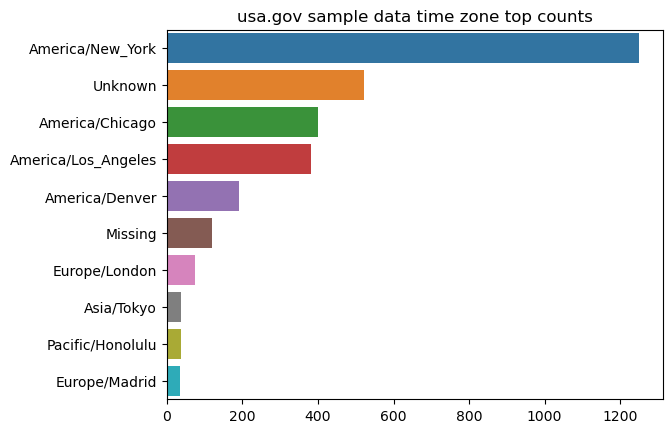

In [318]:
#使用seaborn包，绘制一个水平柱状图，展示每个time zone有多少个。
import seaborn as sns
import matplotlib.pyplot as plt

subset = tz_counts[:10]
sns.barplot(y = subset.index, x = subset.values)
plt.title("usa.gov sample data time zone top counts")

In [319]:
#代码意义：看a列，第N个元素，前M个字符
#a列包含了执行网址缩短的浏览器，设备或应用的信息：


#看a列，第2个元素
frame['a'][1]
#'GoogleMaps/RochesterNY'

frame['a'][50]
#'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

#通过frame['a']选择了DataFrame中的'a'列，然后使用索引操作符[51]选取了索引为51的元素。使用切片操作符[:50]获取了这个字符串的前50个字符。
frame['a'][51][:50]
#'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [320]:
#代码意义：一个包含DataFrame列'a'中非空字符串的第一个单词的Series对象。数第一个对象每种有多少个。
#分离字符串中的第一个标记，并对用户行为进行概括：

# 这段代码创建了一个Series对象，其中的值是从DataFrame列'a'中提取的字符串的第一个单词。
# 首先，通过frame.a选择了DataFrame中的列'a'，然后使用dropna()方法删除其中的缺失值。
# 接下来，通过列表推导式[x.split()[0] for x in frame.a.dropna()]，对每个非空的字符串进行处理，
# 使用split()方法将其拆分成单词，并选择第一个单词作为Series对象中的值。

#a列去掉na值后：
frame.a.dropna()
# 0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
# 1                                  GoogleMaps/RochesterNY
# 2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
# ...
                     
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]
# 0               Mozilla/5.0
# 1    GoogleMaps/RochesterNY
# 2               Mozilla/4.0
# 3               Mozilla/5.0
# 4               Mozilla/5.0
# dtype: object

#计算了Series对象中每个唯一值的频数，并返回频数最高的前8个值，及其对应的频数。
results.value_counts()[:8]
# Mozilla/5.0                 2594
# Mozilla/4.0                  601
# GoogleMaps/RochesterNY       121
# Opera/9.80                    34
# TEST_INTERNET_AGENT           24
# GoogleProducer                21
# Mozilla/6.0                    5
# BlackBerry8520/5.0.0.681       4
# dtype: int64

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [321]:
#代码意义：在a列，如果包含某个字符就标记为A， 否则标记为B. 数有多少个。

#假设想将时区计数多的时区，记录分解为windows和非windows用户。
#如果字符串'Windows'在代理字符串中，就认为用户在Windows上。
#由于一些代理字符串的缺失，将从数据中排出这些代理字符串：

# 创建了一个新的DataFrame对象cframe，该对象包含了原始DataFrame中列'a'非空的所有行数据。
# 通过使用np.where函数和str.contains方法，根据列'a'中的字符串内容判断操作系统类型。
# 如果字符串包含'Window'，则对应行的'os'列被赋值为'Window'，否则赋值为'Not Window'。
# 输出cframe['os']的前5行数据，展示了操作系统类型列的取值情况。

import numpy as np

cframe = frame[frame.a.notnull()]
cframe
# a	c	nk	tz	gr	g	h	l	al	hh	r	u	t	hc	cy	ll	_heartbeat_	kw
# 0	Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...	US	1.0	America/New_York	MA	A6qOVH	wfLQtf	orofrog	en-US,en;q=0.8	1.usa.gov	http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...	http://www.ncbi.nlm.nih.gov/pubmed/22415991	1.331923e+09	1.331823e+09	Danvers	[42.576698, -70.954903]	NaN	NaN
# 1	GoogleMaps/RochesterNY	US	0.0	America/Denver	UT	mwszkS	mwszkS	bitly	NaN	j.mp	http://www.AwareMap.com/	http://www.monroecounty.gov/etc/911/rss.php	1.331923e+09	1.308262e+09	Provo	[40.218102, -111.613297]	NaN	NaN
# 2	Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...	US	1.0	America/New_York	DC	xxr3Qb	xxr3Qb	bitly	en-US	1.usa.gov	http://t.co/03elZC4Q	http://boxer.senate.gov/en/press/releases/0316...	1.331923e+09	1.331920e+09	Washington	[38.9007, -77.043098]	NaN	NaN

cframe['os'] = np.where(cframe['a'].str.contains('Window'), 
                              'Window', 'Not Window')
cframe['os'][:5]
# # # 0        Window
# # # 1    Not Window
# # # 2        Window
# # # 3    Not Window
# # # 4        Window
# # # Name: os, dtype: object

cframe['os'].value_counts()
# Window        2246
# Not Window    1194
# Name: os, dtype: int64

C:\Users\miran\AppData\Local\Temp\ipykernel_6848\3773149108.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os'] = np.where(cframe['a'].str.contains('Window'),


Window        2246
Not Window    1194
Name: os, dtype: int64

In [322]:
#可以根据时区列以及新生成的操作系统列对数据进行分组：

by_tz_os = cframe.groupby(['tz', 'os'])


In [323]:
# 代码意义：pivot table window和not window后，看每组多少个

# 与value_counts函数类似，分组计数可以使用size计算。然后使用unstack对计算结果进行重塑：

# 使用fillna(0)方法将缺失值（NaN）填充为0，得到最终的聚合结果agg_counts，它表示了每个时区下各种操作系统类型的计数统计。
# 使用unstack()方法将Series对象转换为DataFrame对象，其中行索引是时区，列索引是操作系统类型。
# 通过by_tz_os.size()计算了按照时区和操作系统类型分组后的每个组的大小（即计数），得到一个Series对象。

agg_counts = by_tz_os.size().unstack().fillna(0)

agg_counts[:10]
# os	Not Window	Window
# tz		
# 245.0	276.0
# Africa/Cairo	0.0	3.0
# Africa/Casablanca	0.0	1.0
# Africa/Ceuta	0.0	2.0
# Africa/Johannesburg	0.0	1.0
# Africa/Lusaka	0.0	1.0
# America/Anchorage	4.0	1.0
# America/Argentina/Buenos_Aires	1.0	0.0
# America/Argentina/Cordoba	0.0	1.0
# America/Argentina/Mendoza	0.0	1.0

os,Not Window,Window
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [324]:
#最后选出总体计数最高的时区。在agg_counts中根据行的计数，构造了一个间接索引数组：

# 使用agg_counts.sum(1)计算了每个时区下不同操作系统类型的计数总和，并返回一个Series对象。
# 使用argsort()方法对计数总和进行排序，得到一个索引数组，表示按照计数总和的升序排列的时区的索引顺序。
# 将这个索引数组赋值给变量indexer，它可以用于对agg_counts进行重新排序，以便按照计数总和的升序展示时区和操作系统类型的计数统计。

#用于升序排列
indexer = agg_counts.sum(1).argsort()
indexer[:10]
# tz
#                                   24
# Africa/Cairo                      20
# Africa/Casablanca                 21
# Africa/Ceuta                      92
# Africa/Johannesburg               87
# Africa/Lusaka                     53
# America/Anchorage                 54
# America/Argentina/Buenos_Aires    57
# America/Argentina/Cordoba         26
# America/Argentina/Mendoza         55
# dtype: int64



tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [325]:
#使用take方法按顺序选出行，之后再对最后10行进行切片（最大的10个值）：

count_subset = agg_counts.take(indexer[-10:])
count_subset
# os	Not Window	Window
# tz		
# America/Sao_Paulo	13.0	20.0
# Europe/Madrid	16.0	19.0
# Pacific/Honolulu	0.0	36.0
# Asia/Tokyo	2.0	35.0
# Europe/London	43.0	31.0
# America/Denver	132.0	59.0
# America/Los_Angeles	130.0	252.0
# America/Chicago	115.0	285.0
# 245.0	276.0
# America/New_York	339.0	912.0

os,Not Window,Window
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [326]:
#pandas有一个便捷方法叫做nlargest, 可以做同样的事情：

agg_counts.sum(1).nlargest(10)
# tz
# America/New_York       1251.0
#                         521.0
# America/Chicago         400.0
# America/Los_Angeles     382.0
# America/Denver          191.0
# Europe/London            74.0
# Asia/Tokyo               37.0
# Pacific/Honolulu         36.0
# Europe/Madrid            35.0
# America/Sao_Paulo        33.0
# dtype: float64

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

Text(0.5, 1.0, 'Top time zones by Windows and non-Windows users')

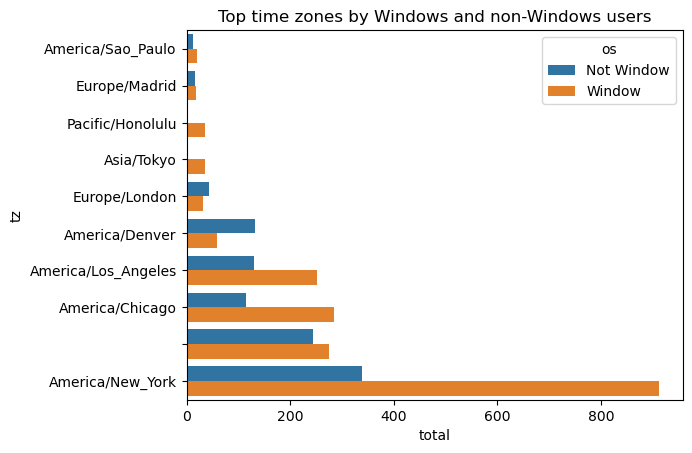

In [327]:
#绘制一个堆积条形图：

count_subset = agg_counts.take(indexer[-10:])
count_subset

import pandas as pd

count_subset = pd.DataFrame(count_subset)                #先将Series转换为data frame
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()                #reset_index()方法将索引重新设置为列，以便得到一个新的DataFrame对象。
count_subset[:10]
sns.barplot(x = 'total', y = 'tz', hue = 'os', data = count_subset)   #hue参数表示根据操作系统类型进行颜色分类
plt.title("Top time zones by Windows and non-Windows users")

C:\Users\miran\AppData\Local\Temp\ipykernel_6848\3709258719.py:17: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  results = count_subset.groupby('tz').apply(norm_total)


Text(0.5, 1.0, 'Percentage Windows and non-Windows users in top occurring time zones')

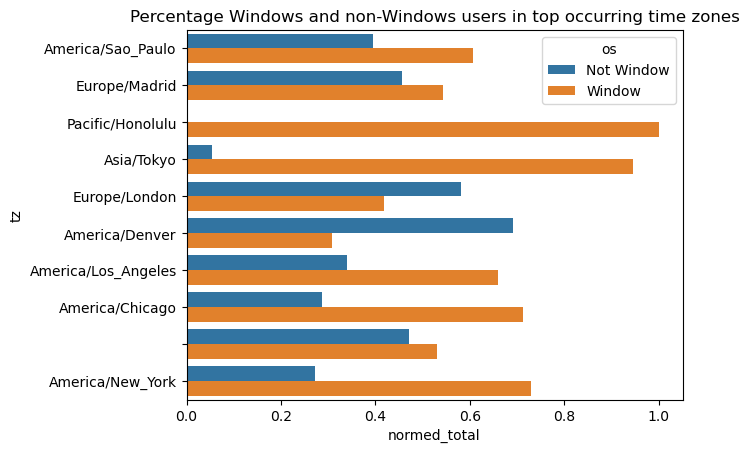

In [328]:
#该图不容易看到较小组中的 windows用户的相对百分比，因此让我们将每组百分比归一化为1：
#即展示的是，每组中os的相对比例。

#定义了一个名为norm_total的函数，用于对分组进行标准化处理。
#函数接受一个分组对象作为参数，然后将每个分组的total列除以该分组的总和，并将结果保存在一个新的normed_total列中。

#通过使用groupby方法按照'tz'列对count_subset进行分组，并对每个分组应用norm_total函数。
#这将在每个分组内执行标准化操作，并将结果合并为一个包含标准化后数据的新数据集results。

#groupby操作会将数据按照'tz'列的唯一值进行分组，并将每个分组应用于norm_total函数。
#最后，将处理后的结果存储在results变量中。

def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)
results
sns.barplot(x = 'normed_total', y = 'tz', hue = 'os', data = results)
plt.title("Percentage Windows and non-Windows users in top occurring time zones")

In [329]:
#通过transfer方法和groupby方法，更有效计算归一化之和：

g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')
#results2

## 14.2 MovieLens 1M数据集 MovieLens 1M Dataset

In [330]:
import pandas as pd

pd.options.display.max_rows = 10
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('C:/Users/miran/lpthw/users.dat', sep = '::', 
                      header = None, names = unames)
#users
# 	user_id	gender	age	occupation	zip
# 0	1	F	1	10	48067
# 1	2	M	56	16	70072
# 2	3	M	25	15	55117
# ...
# 6037	6038	F	56	1	14706
# 6038	6039	F	45	0	01060
# 6039	6040	M	25	6	11106

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('C:/Users/miran/lpthw/ratings.dat', sep = '::', 
                      header = None, names = rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('C:/Users/miran/lpthw/movies.dat', sep = '::', 
                      header = None, names = mnames)

users[:5]
# user_id	gender	age	occupation	zip
# 0	1	F	1	10	48067
# 1	2	M	56	16	70072
# 2	3	M	25	15	55117
# 3	4	M	45	7	02460
# 4	5	M	25	20	55455

ratings[:5]
# user_id	movie_id	rating	timestamp
# 0	1	1193	5	978300760
# 1	1	661	3	978302109
# 2	1	914	3	978301968
# 3	1	3408	4	978300275
# 4	1	2355	5	978824291

movies[:5]
# movie_id	title	genres
# 0	1	Toy Story (1995)	Animation|Children's|Comedy
# 1	2	Jumanji (1995)	Adventure|Children's|Fantasy
# 2	3	Grumpier Old Men (1995)	Comedy|Romance
# 3	4	Waiting to Exhale (1995)	Comedy|Drama
# 4	5	Father of the Bride Part II (1995)	Comedy

ratings
# 	user_id	movie_id	rating	timestamp
# 0	1	1193	5	978300760
# 1	1	661	3	978302109
# 2	1	914	3	978301968
# ...
# 1000206	6040	562	5	956704746
# 1000207	6040	1096	4	956715648
# 1000208	6040	1097	4	956715569
# 1000209 rows × 4 columns

C:\Users\miran\AppData\Local\Temp\ipykernel_6848\2743816868.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table('C:/Users/miran/lpthw/users.dat', sep = '::',
C:\Users\miran\AppData\Local\Temp\ipykernel_6848\2743816868.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table('C:/Users/miran/lpthw/ratings.dat', sep = '::',
C:\Users\miran\AppData\Local\Temp\ipykernel_6848\2743816868.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [331]:
#如果想按性别和年龄计算某个电影平均评分。
#将raitings表与users表合并，将结果与mvoies表数据合并。
#pandas根据重叠名称推断那些列用作合并的（或连接）键位：

data = pd.merge(pd.merge(ratings, users), movies)
data
# user_id	movie_id	rating	timestamp	gender	age	occupation	zip	title	genres
# 0	1	1193	5	978300760	F	1	10	48067	One Flew Over the Cuckoo's Nest (1975)	Drama
# 1	2	1193	5	978298413	M	56	16	70072	One Flew Over the Cuckoo's Nest (1975)	Drama
# ...
# 1000207	5851	3607	5	957756608	F	18	20	55410	One Little Indian (1973)	Comedy|Drama|Western
# 1000208	5938	2909	4	957273353	M	25	1	35401	Five Wives, Three Secretaries and Me (1998)	Documentary
# 1000209 rows × 10 columns

#data.iloc[0]是用于访问DataFrame中的第一行数据。
#iloc是用于基于整数位置进行索引的属性，其中i代表integer（整数），loc代表location（位置）
#获取DataFrame中第一行的数据，即得到dictionary。

data.iloc[0]                                                        
# user_id                                            1
# movie_id                                        1193
# rating                                             5
# timestamp                                  978300760
# gender                                             F
# age                                                1
# occupation                                        10
# zip                                            48067
# title         One Flew Over the Cuckoo's Nest (1975)
# genres                                         Drama
# Name: 0, dtype: object

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [332]:
#为了获得按性别分级的每部电影的平均电影评分，可以使用pivot_table方法：
#在已经连接好的data表上，pv：

mean_ratings = data.pivot_table('rating', index = 'title', 
                               columns = 'gender', aggfunc = 'mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [333]:
#先计算了title, count(*)；挑出 >=250的title；titles in active titles筛选除了Pivot table中需要的内容。

#上述代码产生了另一个data frame，包含标题作为行标签，性别作为列标签，平均评分。
#首先过滤掉少于250（自定）个评分的电影。
#接着按标题对数据进行分组，并使用size()为每个标题获取一个元素是个分组大小的series：
#data.groupby('title')将数据按照电影标题进行分组。然后，使用.size()计算每个分组的大小，即每个电影标题对应的评分数量。

ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]
# title
# $1,000,000 Duck (1971)                37
# 'Night Mother (1986)                  70
# ...
# 101 Dalmatians (1996)                364
# 12 Angry Men (1957)                  616
# dtype: int64

#ratings_by_title.index返回ratings_by_title中的索引，即电影标题
#通过ratings_by_title >= 250创建一个布尔型Series。
#其中值为True表示对应电影标题的评分数量大于等于250，而值为False表示评分数量小于250。
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles
# # Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
# #        '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
# #        '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
# #        '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
# #        '2010 (1984)',
# #        ...
# #        'X-Men (2000)', 'Year of Living Dangerously (1982)',
# #        'Yellow Submarine (1968)', 'You've Got Mail (1998)',
# #        'Young Frankenstein (1974)', 'Young Guns (1988)',
# #        'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
# #        'Zero Effect (1998)', 'eXistenZ (1999)'],
# #       dtype='object', name='title', length=1216)

#通过使用.loc索引操作符，可以基于索引标签来选择DataFrame的行。
#mean_ratings.loc[active_titles]将从mean_ratings中选择那些索引标签存在于active_titles列表中的行，返回一个新的DataFrame对象。
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings
# # gender	F	M
# # title		
# # 'burbs, The (1989)	2.793478	2.962085
# # 10 Things I Hate About You (1999)	3.646552	3.311966
# # 101 Dalmatians (1961)	3.791444	3.500000
# # ...
# # Zero Effect (1998)	3.864407	3.723140
# # eXistenZ (1999)	3.098592	3.289086
# # 1216 rows × 2 columns

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


### 14.2.1 测量评价分歧 Measuring Rating Disagreement

In [334]:
#如果想找到男性和女性观众之间最具分歧性的电影。
#方法1：添加1列含有均值差的mean_ratings中，按以下方式排序：

mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
mean_ratings['diff']
# title
# 'burbs, The (1989)                   0.168607
# 10 Things I Hate About You (1999)   -0.334586
# 101 Dalmatians (1961)               -0.291444
# ...
# Zero Effect (1998)                  -0.141266
# eXistenZ (1999)                      0.190494
# Name: diff, Length: 1216, dtype: float64

#按照diff排序产生评分差异最大的电影，以便看到哪些是女性首选的：
sorted_by_diff = mean_ratings.sort_values(by = 'diff')
sorted_by_diff[:10]
# gender	F	M	diff
# title			
# Dirty Dancing (1987)	3.790378	2.959596	-0.830782
# Jumpin' Jack Flash (1986)	3.254717	2.578358	-0.676359
# Grease (1978)	3.975265	3.367041	-0.608224
# Little Women (1994)	3.870588	3.321739	-0.548849
# Steel Magnolias (1989)	3.901734	3.365957	-0.535777
# Anastasia (1997)	3.800000	3.281609	-0.518391
# Rocky Horror Picture Show, The (1975)	3.673016	3.160131	-0.512885
# Color Purple, The (1985)	4.158192	3.659341	-0.498851
# Age of Innocence, The (1993)	3.827068	3.339506	-0.487561
# Free Willy (1993)	2.921348	2.438776	-0.482573

#转换行的顺序，切片出top10的行，可以获得男性更喜欢但女性评分不高的电影：
sorted_by_diff[::-1][:10]                                                          #对行倒序，取前10行
# gender	F	M	diff
# title			
# Good, The Bad and The Ugly, The (1966)	3.494949	4.221300	0.726351
# Kentucky Fried Movie, The (1977)	2.878788	3.555147	0.676359
# Dumb & Dumber (1994)	2.697987	3.336595	0.638608
# Longest Day, The (1962)	3.411765	4.031447	0.619682
# Cable Guy, The (1996)	2.250000	2.863787	0.613787
# Evil Dead II (Dead By Dawn) (1987)	3.297297	3.909283	0.611985
# Hidden, The (1987)	3.137931	3.745098	0.607167
# Rocky III (1982)	2.361702	2.943503	0.581801
# Caddyshack (1980)	3.396135	3.969737	0.573602
# For a Few Dollars More (1965)	3.409091	3.953795	0.544704

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [335]:
#假设想要的是不依赖于性别标识而在观众中引起最大异议的电影。
#异议可以通过评分的方差或标准差来衡量。

rating_std_by_title = data.groupby('title')['rating'].std()                       #group by title的标准差 
rating_std_by_title = rating_std_by_title.loc[active_titles]                      #筛选到active titles
rating_std_by_title.sort_values(ascending = False)[:10]                           #降序排列
# title
# Dumb & Dumber (1994)                     1.321333
# Blair Witch Project, The (1999)          1.316368
# Natural Born Killers (1994)              1.307198
# Tank Girl (1995)                         1.277695
# Rocky Horror Picture Show, The (1975)    1.260177
# Eyes Wide Shut (1999)                    1.259624
# Evita (1996)                             1.253631
# Billy Madison (1995)                     1.249970
# Fear and Loathing in Las Vegas (1998)    1.246408
# Bicentennial Man (1999)                  1.245533
# Name: rating, dtype: float64

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 14.3 美国80-10 婴儿名字 US Baby Names 1880–2010

In [336]:
#美国社保局SSA 提供了从1880至现在，婴儿姓名频率的数据。

import pandas as pd
names1880 =  pd.read_table('C:/Users/miran/lpthw/yob1880.txt',
                           sep = ',', names = ['name','sex','births'])
names1880
# name	sex	births
# 0	Mary	F	7065
# 1	Anna	F	2604
# 2	Emma	F	2003
# 3	Elizabeth	F	1939
# 4	Minnie	F	1746
# ...	...	...	...
# 1995	Woodie	M	5
# 1996	Worthy	M	5
# 1997	Wright	M	5
# 1998	York	M	5
# 1999	Zachariah	M	5
# 2000 rows × 3 columns

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [337]:
#文件只包含每年至少有5次出现的名字。可以使用按性别列出的出生总和，作为当年的出生总数：

names1880.groupby('sex').births.sum()
# sex
# F     90993
# M    110493
# Name: births, dtype: int64

#由于数据集按年份分为多个文件，首先要做的事情是将所有数据集中到一个data frame中，再添加一个年份字段。
#可以使用pandas.concat：
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = r'C:\Users\miran\lpthw\yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index = True)

names
# name	sex	births	year
# 0	Mary	F	7065	1880
# 1	Anna	F	2604	1880
# 2	Emma	F	2003	1880
# 3	Elizabeth	F	1939	1880
# 4	Minnie	F	1746	1880
# ...	...	...	...	...
# 1690781	Zyquarius	M	5	2010
# 1690782	Zyran	M	5	2010
# 1690783	Zzyzx	M	5	2010
# 1690784 rows × 4 columns

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

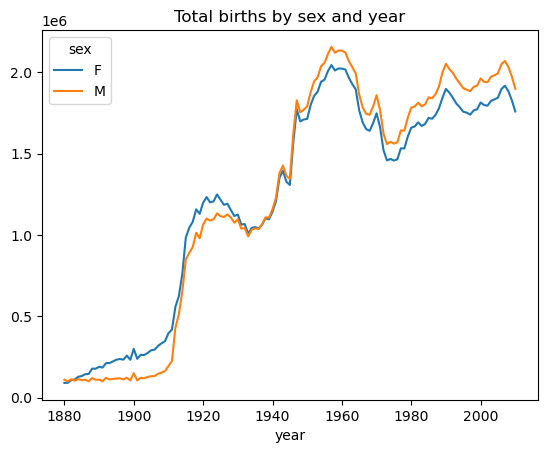

In [338]:
total_births = names.pivot_table('births', index = 'year', 
                                columns = 'sex', aggfunc = sum)
total_births.tail()
# sex	F	M
# year		
# 2006	1896468	2050234
# 2007	1916888	2069242
# 2008	1883645	2032310
# 2009	1827643	1973359
# 2010	1759010	1898382
total_births.plot(title = 'Total births by sex and year')

In [339]:
#插入一个prop列，给每个婴儿名字相对于出生总数的比例。
#prop值为0.2表示每100个婴儿中有2个起了某个名字。
#按年份和性别对数据进行分组，然后将新列添加到每个组：

def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group 
names = names.groupby(['year', 'sex']).apply(add_prop)                          #?

# name	sex	births	year	prop
# 0	Mary	F	7065	1880	0.077643
# 1	Anna	F	2604	1880	0.028618
# 2	Emma	F	2003	1880	0.022013
# 3	Elizabeth	F	1939	1880	0.021309
# 4	Minnie	F	1746	1880	0.019188
# ...	...	...	...	...	...
# 1690779	Zymaire	M	5	2010	0.000003
# 1690780	Zyonne	M	5	2010	0.000003
# 1690781	Zyquarius	M	5	2010	0.000003
# 1690782	Zyran	M	5	2010	0.000003
# 1690783	Zzyzx	M	5	2010	0.000003
# 1690784 rows × 5 columns

C:\Users\miran\AppData\Local\Temp\ipykernel_6848\1860781603.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  names = names.groupby(['year', 'sex']).apply(add_prop)                          #?


In [340]:
#执行此类组操作时，进行完整性检查有价值。比如验证所有组中的prop列总计为1：
names.groupby(['year', 'sex']).prop.sum()
# year  sex
# 1880  F      1.0
#       M      1.0
# 1881  F      1.0
#       M      1.0
# 1882  F      1.0
#             ... 
# 2008  M      1.0
# 2009  F      1.0
#       M      1.0
# 2010  F      1.0
#       M      1.0
# Name: prop, Length: 262, dtype: float64

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [341]:
#提取一部分数据以便进一步分析：每个性别/年份组合的前1000名。

#法1：
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
#删除不需要的组索引
top1000.reset_index(inplace = True, drop = True)

#法2：DIY代码
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by = 'births', ascending = False)[:1000])
top1000 = pd.concat(pieces, ignore_index = True)

top1000
# name	sex	births	year	prop
# 0	Mary	F	7065	1880	0.077643
# 1	Anna	F	2604	1880	0.028618
# 2	Emma	F	2003	1880	0.022013
# 3	Elizabeth	F	1939	1880	0.021309
# 4	Minnie	F	1746	1880	0.019188
# ...	...	...	...	...	...
# 261872	Camilo	M	194	2010	0.000102
# 261873	Destin	M	194	2010	0.000102
# 261874	Jaquan	M	194	2010	0.000102
# 261875	Jaydan	M	194	2010	0.000102
# 261876	Maxton	M	193	2010	0.000102
# 261877 rows × 5 columns

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


### 14.3.1 分析名字趋势 Analyzing Naming Trends

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

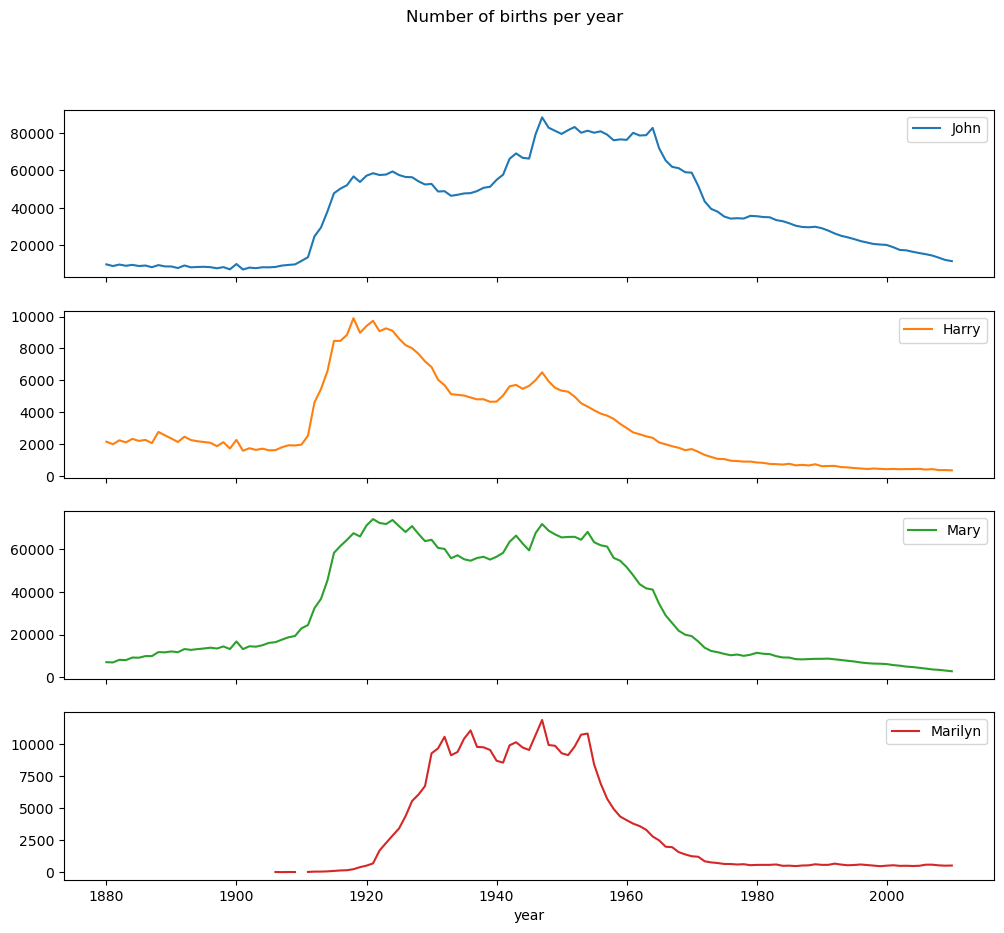

In [342]:
#将top 1000 分成男孩和女孩：
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

#按年份和名字形成出生总数的数据透视表：
#简单的时间序列，比如每年的John和Mary数量，都可以绘制出来。
total_births = top1000.pivot_table('births', index = 'year',
                                   columns = 'name', 
                                   aggfunc = sum)

#使用data frame的plot方法，绘制少数名称的透视表：
total_births.info()
# <class 'pandas.core.frame.DataFrame'>
# Int64Index: 131 entries, 1880 to 2010
# Columns: 6868 entries, Aaden to Zuri
# dtypes: float64(6868)
# memory usage: 6.9 MB

# #上图得到初步结论，上述名字美国人用的越来越少了。但事实更加复杂。
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots = True, figsize = (12, 10), grid = False, 
            title = "Number of births per year")

### 14.3.1.1 计量命名多样性的增加 Measuring the increase in naming diversity

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

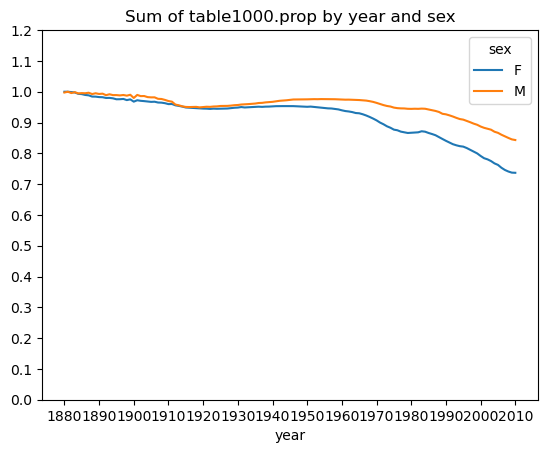

In [343]:
#衡量指标:top 1000最受欢迎的名字所涵盖婴儿的出生比例，按照年份和性别进行聚合和绘图：

table = top1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc = sum)
table.plot(title = 'Sum of table1000.prop by year and sex', 
           yticks = np.linspace(0, 1.2, 13), xticks = range(1880, 2020, 10))

In [344]:
#似乎有越来越多的名字多样性，因为top1000名字的总比例降低。
#另一指标是不同名字的数量，按最高到最低的受欢迎程度在出生人数最高的50%名字中排序。

df = boys[boys.year == 2010]
df
# name	sex	births	year	prop
# 260877	Jacob	M	21875	2010	0.011523
# 260878	Ethan	M	17866	2010	0.009411
# 260879	Michael	M	17133	2010	0.009025
# 260880	Jayden	M	17030	2010	0.008971
# 260881	William	M	16870	2010	0.008887
# ...	...	...	...	...	...
# 261872	Camilo	M	194	2010	0.000102
# 261873	Destin	M	194	2010	0.000102
# 261874	Jaquan	M	194	2010	0.000102
# 261875	Jaydan	M	194	2010	0.000102
# 261876	Maxton	M	193	2010	0.000102
# 1000 rows × 5 columns

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [345]:
#按降序排列prop后，想知道有多少名字是最受欢迎的50%。可以写一个for循环来实现这一点，但矢量化的numpy更聪明。
#获取prop的累积总和cumsum，然后调用searchsorted方法返回累积总和中的位置，再该处插入0.5以保持排序顺序：

#.sort_values()方法按照列'prop'的值对DataFrame进行降序排序，ascending=False表示降序排序。
#.prop.cumsum()对排序后的'prop'列进行累积求和操作，返回一个包含累积和的Series对象。

prop_cumsum = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
prop_cumsum[:10]
# 260877    0.011523
# 260878    0.020934
# 260879    0.029959
# 260880    0.038930
# 260881    0.047817
# 260882    0.056579
# 260883    0.065155
# 260884    0.073414
# 260885    0.081528
# 260886    0.089621
# Name: prop, dtype: float64

prop_cumsum.values.searchsorted(0.5)
#116

116

In [346]:
#由于数组时零索引的，所以给这个结果加1会得到117的结果。相比之下，1900这个数字要小很多：

df = boys[boys.year == 1900]
in1900 = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1
#25

25

In [347]:
#现在可以将此操作应用于每个年/性别分组，通过这些字段进行group by，并将返回值是每个分组计数值的函数apply到每个分组上：

#get_quantile_count是一个自定义函数，用于计算每个组内累积占比达到给定分位数的数量。
#group是一个DataFrame，按照'prop'列的值进行降序排序。
#group.prop.cumsum().values计算了'prop'列的累积和，并返回一个包含累积和的NumPy数组。
#.searchsorted(q)在累积和数组中找到给定分位数q所对应的位置，并返回该位置的索引。
#+ 1是为了将索引值转换为数量值，因为索引从0开始。

#diversity是一个DataFrame，其中的索引是['year', 'sex']，列名为不同的性别，每个单元格的值表示对应组内累积占比达到给定分位数的数量。
#在代码中，top1000 DataFrame首先根据['year', 'sex']分组，然后将每个组应用get_quantile_count函数，并将结果存储在diversity中。
#最后，通过使用.unstack('sex')将性别作为列来重塑diversity DataFrame，使得每个性别的数量成为列的值。

def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by = 'prop', ascending = False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

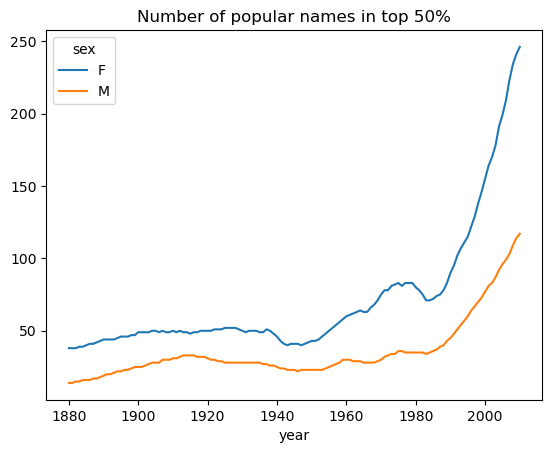

In [348]:
#产生的data frame diversity现在有2个时间序列，每个时间序列对应一种性别，按照年份索引。

diversity.head()
# sex	F	M
# year		
# 1880	38	14
# 1881	38	14
# 1882	38	15
# 1883	39	15
# 1884	39	16

diversity.plot(title = 'Number of popular names in top 50%')
#可以女孩的名字比男孩名字更加多样化，随着时间推移他们越来越多。

### 14.3.1.2 最后一个字母革命

In [349]:
#透视表是一种将数据重新排列并以一种可读性更好的方式呈现的数据结构。

#男孩名字最后一个字母的分布在过去100年发生了重大变化。按照年份、性别和最后一个字母汇总完整数据集中的所有出生情况：
#根据最后一个字母对名字进行了分组，并在不同的性别和年份上计算了每个字母对应的出生总数。

#从name列提取最后一个字母

# get_last_letter是一个匿名函数（lambda函数），用于从名字中提取最后一个字母。
# last_letters是一个Series，其中的值是通过应用get_last_letter函数到names.name Series中的每个元素得到的最后一个字母。
# last_letters.name = 'last_letter'为Series指定了名称为'last_letter'。

# table是一个透视表，根据最后一个字母（last_letters）作为索引，以性别（'sex'）和年份（'year'）为列，
# 使用'sum'作为聚合函数计算了'births'列的总和。

get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index = last_letters, 
                         columns = ['sex', 'year'], aggfunc = sum)
table
# sex	F	...	M
# year	1880	1881	1882	1883	1884	1885	1886	1887	1888	1889	...	2001	2002	2003	2004	2005	2006	2007	2008	2009	2010
# last_letter																					
# a	31446.0	31581.0	36536.0	38330.0	43680.0	45408.0	49100.0	48942.0	59442.0	58631.0	...	39124.0	38815.0	37825.0	38650.0	36838.0	36156.0	34654.0	32901.0	31430.0	28438.0
# b	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	...	50950.0	49284.0	48065.0	45914.0	43144.0	42600.0	42123.0	39945.0	38862.0	38859.0
# ...
# y	10469.0	10404.0	12145.0	12063.0	13917.0	13927.0	14936.0	14980.0	17931.0	17601.0	...	139109.0	134557.0	130569.0	128367.0	125190.0	123707.0	123397.0	122633.0	112922.0	110425.0
# z	106.0	95.0	106.0	141.0	148.0	150.0	202.0	188.0	238.0	277.0	...	2840.0	2737.0	2722.0	2710.0	2903.0	3086.0	3301.0	3473.0	3633.0	3476.0
# 26 rows × 262 columns

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
...              ...      ...      ...      ...      ...      ...      ...   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
...              ...      ...      ...  ...       ...       ...       ...   
v                NaN      NaN      NaN  ...    1209.0    1332.0    1652.0   
w                NaN      NaN      NaN  ...   52265.0   50103.0   49079.0   
x                NaN      NaN      NaN  ...   10691.0   11009.0   11718.0   
y            14980.0  17931.0  17601.0  ...  139109.0  134557.0  130569.0   
z              188.0    238.0    277.0  ...    2840.0    2737.0    2722.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b             45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c             26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d             51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e            142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   
...               ...       ...       ...       ...       ...       ...   
v              1823.0    1794.0    2010.0    2295.0    2418.0    2589.0   
w             47556.0   45464.0   43217.0   40251.0   36937.0   33181.0   
x             12399.0   13025.0   13992.0   14306.0   14834.0   16640.0   
y            128367.0  125190.0  123707.0  123397.0  122633.0  112922.0   
z              2710.0    2903.0    3086.0    3301.0    3473.0    3633.0   

sex                    
year             2010  
last_letter            
a             28438.0  
b             38859.0  
c             23125.0  
d             44398.0  
e            129012.0  
...               ...  
v              2723.0  
w             30656.0  
x             16352.0  
y            110425.0  
z              3476.0  

[26 rows x 262 columns]

In [350]:
#选出历史上3个有代表性的年份并列出前几行：

#subtable是通过重新索引table中的列（column），将列筛选为1910年、1960年和2010年，其中level='year'表示根据'year'这个级别进行重新索引。
#通过使用reindex方法，可以按照指定的列索引（columns）重新排列DataFrame的列顺序。

subtable = table.reindex(columns = [1910, 1960, 2010], level = 'year')
subtable.head()
# sex	F	M
# year	1910	1960	2010	1910	1960	2010
# last_letter						
# a	108376.0	691247.0	670605.0	977.0	5204.0	28438.0
# b	NaN	694.0	450.0	411.0	3912.0	38859.0
# c	5.0	49.0	946.0	482.0	15476.0	23125.0
# d	6750.0	3729.0	2607.0	22111.0	262112.0	44398.0
# e	133569.0	435013.0	313833.0	28655.0	178823.0	129012.0

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [351]:
#按照出生总数对表格进行归一化处理，计算一个新表格，其中包含每个性别的每个结束字母占总出生数的比例：

subtable.sum()
# sex  year
# F    1910     396416.0
#      1960    2022062.0
#      2010    1759010.0
# M    1910     194198.0
#      1960    2132588.0
#      2010    1898382.0
# dtype: float64

letter_prop = subtable / subtable.sum()
letter_prop
# sex	F	M
# year	1910	1960	2010	1910	1960	2010
# last_letter						
# a	0.273390	0.341853	0.381240	0.005031	0.002440	0.014980
# b	NaN	0.000343	0.000256	0.002116	0.001834	0.020470
# c	0.000013	0.000024	0.000538	0.002482	0.007257	0.012181
# d	0.017028	0.001844	0.001482	0.113858	0.122908	0.023387
# e	0.336941	0.215133	0.178415	0.147556	0.083853	0.067959
# ...	...	...	...	...	...	...
# v	NaN	0.000060	0.000117	0.000113	0.000037	0.001434
# w	0.000020	0.000031	0.001182	0.006329	0.007711	0.016148
# x	0.000015	0.000037	0.000727	0.003965	0.001851	0.008614
# y	0.110972	0.152569	0.116828	0.077349	0.160987	0.058168
# z	0.002439	0.000659	0.000704	0.000170	0.000184	0.001831

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

Text(0.5, 0.98, 'Distribution of Last Letters by Gender')

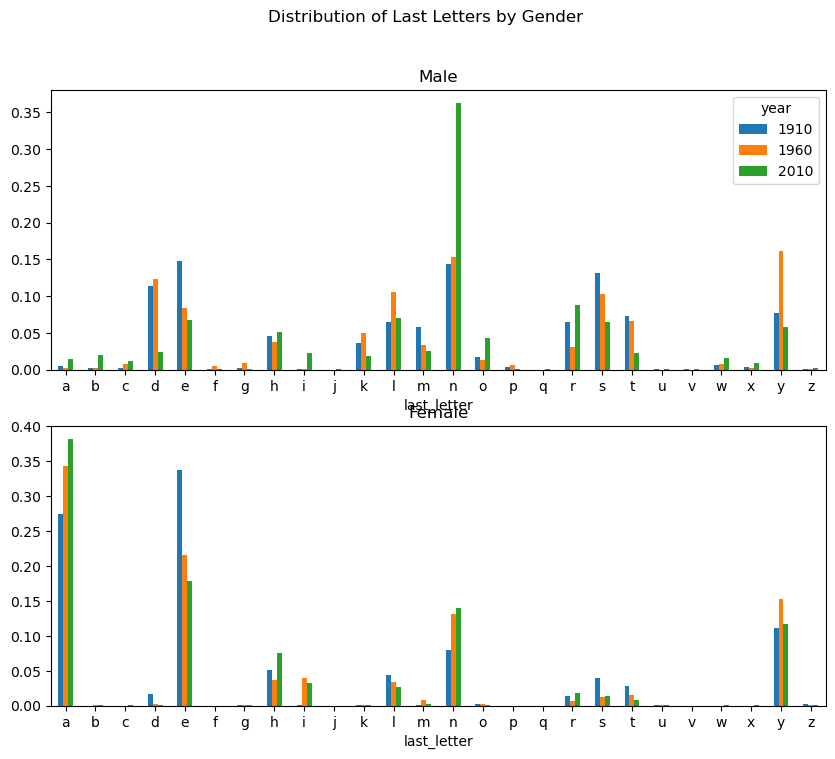

In [352]:
#现在根据掌握的字母比例，可以绘制出按年划分的每个性别的条形图：

#图1:男性孩子名字的出现频率的柱状图。
#两个子图的图表，子图以2行1列的布局进行排列，图表的大小为(10, 8)。
#使用letter_prop['M'].plot()绘制了一个柱状图，表示男性孩子名字的出现频率。
#kind='bar'表示绘制柱状图，rot=0表示x轴标签不进行旋转，ax=axes[0]表示将图绘制在第一个子图上，title='Male'设置了子图的标题为"Male"。

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize = (10, 8))
letter_prop['M'].plot(kind = 'bar', rot = 0, ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 0, ax = axes[1], title = 'Female', legend = False)

fig.suptitle('Distribution of Last Letters by Gender')

### 14.3.3 最后一个字母革命 The “last letter” revolution

In [353]:
# 自20世纪60年代以来，以n结尾的男孩名字经历了显著的增长，回到之前创建的完整表格，再次按年份和性别标准化，
# 为男孩名字选择一个字母子集，最后转换为每列成为一个时间序列。

#计算每个字母在男性和女性名字中的比例。它将table中的每个值除以相应列的总和，得到了每个字母在各个年份和性别中的比例。
#选择字母'd'、'n'和'y'在男性名字中的比例，并将其转置。
#使用letter_prop.loc来选择特定的行和列，其中['d', 'n', 'y']是所选的行标签，'M'是所选的列标签。


letter_prop = table / table.sum()
#dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M']
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T                               #横版变竖版
dny_ts.head()

# last_letter	d	n	y
# year			
# 1880	0.083055	0.153213	0.075760
# 1881	0.083247	0.153214	0.077451
# 1882	0.085340	0.149560	0.077537
# 1883	0.084066	0.151646	0.079144
# 1884	0.086120	0.149915	0.080405

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<Axes: xlabel='year'>

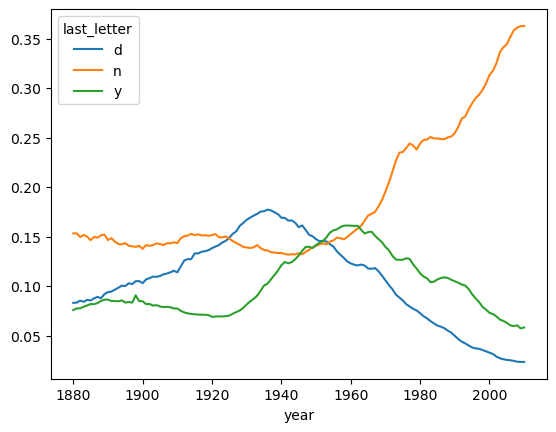

In [354]:
#根据时间序列data frame, 使用plot方法绘制字母随时间变化的趋势：
dny_ts.plot()

### 14.3.4 男孩名字变成女孩名字 Boy names that became girl names (and vice versa)

<Axes: xlabel='year'>

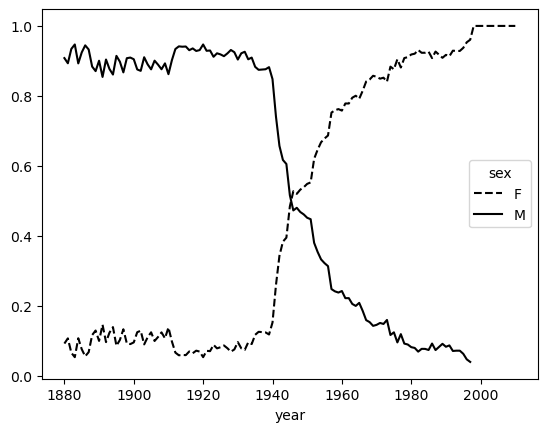

In [355]:
#另一个有趣的趋势，是看到样本中，较早在男性流行的男孩名字，但现在已经改变性别。
#另一个例子是Lesley或Leslie的名字，回到top1000的data frame, 计算数据集中lesl开头的名字列表。

all_names = pd.Series(top1000.name.unique())
all_names
# 0            Mary
# 1            Anna
# 2            Emma
# 3       Elizabeth
# 4          Minnie
#           ...    
# 6863        Masen
# 6864        Rowen
# 6865       Yousef
# 6866       Joziah
# 6867       Maxton
# Length: 6868, dtype: object

lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like
# 632     Leslie
# 2294    Lesley
# 4262    Leslee
# 4728     Lesli
# 6103     Lesly
# dtype: object

#从data frame, 可以过滤掉名字，并对名字分组的出生数进行累加来看相关频率：
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()
# name
# Leslee      1082
# Lesley     35022
# Lesli        929
# Leslie    370429
# Lesly      10067
# Name: births, dtype: int64

#按性别和年份聚合，并在年内进行标准化：
table = filtered.pivot_table('births', index = 'year', columns = 'sex', aggfunc = 'sum')
table = table.div(table.sum(1), axis = 0)                                                     #?
table.tail()
# sex	F	M
# year		
# 2006	1.0	NaN
# 2007	1.0	NaN
# 2008	1.0	NaN
# 2009	1.0	NaN
# 2010	1.0	NaN

#绘制出按性别随时间推移的分解图：
table.plot(style = {'M': 'k-', 'F': 'k--'})

## 14.4 美国农业部食品数据库 USDA Food Database

In [356]:
#农业部USDA提供了食物营养信息数据库。程序员以JSON格式，提供了这个数据库的一个版本。

{
"id": 21441,
"description": "KENTUCKY FRIED CHICKEN, Fried Chicken, ETRA CRISPY, Wing, meat and skin with breading",
"tags":["KFC"],
"manufacturer": "Kentucky Fried Chicken",
"group": "Fast Foods",
"portions": [
{
"amount": 1,
"unit":"wing, with skin",
"grams":68.0    
},
...    
],
"nutrients": [
{
"value": 20.8,
"units": "g",
"description": "Protein",
"group": "Composition"
},    
...    
]
}

{'id': 21441,
 'description': 'KENTUCKY FRIED CHICKEN, Fried Chicken, ETRA CRISPY, Wing, meat and skin with breading',
 'tags': ['KFC'],
 'manufacturer': 'Kentucky Fried Chicken',
 'group': 'Fast Foods',
 'portions': [{'amount': 1, 'unit': 'wing, with skin', 'grams': 68.0},
  Ellipsis],
 'nutrients': [{'value': 20.8,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  Ellipsis]}

In [357]:
import json
db = json.load(open('C:/Users/miran/lpthw/database.json'))
len(db)
#6636

6636

In [358]:
#db中的每个条目都是一个包含单个食物所有数据的词典。'nutrients'字段是一个字典的列表，每个营养元素对应一个字典：

db[0].keys()
#dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

db[0]['nutrients'][0]
# {'value': 25.18,
#  'units': 'g',
#  'description': 'Protein',
#  'group': 'Composition'}

nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]
# value	units	description	group
# 0	25.18	g	Protein	Composition
# 1	29.20	g	Total lipid (fat)	Composition
# 2	3.06	g	Carbohydrate, by difference	Composition
# 3	3.28	g	Ash	Other
# 4	376.00	kcal	Energy	Energy
# 5	39.28	g	Water	Composition
# 6	1573.00	kJ	Energy	Energy

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [359]:
#将字典的列表转换为data frame, 可以指定一个需要提取的字段列表。将提取食物名称，分类，ID和制造商：

info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns = info_keys)
info[:5]
# description	group	id	manufacturer
# 0	Cheese, caraway	Dairy and Egg Products	1008	
# 1	Cheese, cheddar	Dairy and Egg Products	1009	
# 2	Cheese, edam	Dairy and Egg Products	1018	
# 3	Cheese, feta	Dairy and Egg Products	1019	
# 4	Cheese, mozzarella, part skim milk	Dairy and Egg Products	1028	
info.info()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 6636 entries, 0 to 6635
# Data columns (total 4 columns):
#  #   Column        Non-Null Count  Dtype 
# ---  ------        --------------  ----- 
#  0   description   6636 non-null   object
#  1   group         6636 non-null   object
#  2   id            6636 non-null   int64 
#  3   manufacturer  5195 non-null   object
# dtypes: int64(1), object(3)
# memory usage: 207.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [360]:
#通过value_counts查看食物组的分布情况：
pd.value_counts(info.group)[:10]
# Vegetables and Vegetable Products    812
# Beef Products                        618
# Baked Products                       496
# Breakfast Cereals                    403
# Legumes and Legume Products          365
# Fast Foods                           365
# Lamb, Veal, and Game Products        345
# Sweets                               341
# Fruits and Fruit Juices              328
# Pork Products                        328
# Name: group, dtype: int64

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [361]:
#对所有营养元素数据进行分析，将每种食物营养元素组装成一张大表。
#会将食物营养元素的每个列表转换为data frame，为食物添加一列id，然后将data frame附加到列表中。
#然后通过data frame可以通过concat连接在一起。

nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

nutrients
# value	units	description	group	id
# 0	25.180	g	Protein	Composition	1008
# 1	29.200	g	Total lipid (fat)	Composition	1008
# 2	3.060	g	Carbohydrate, by difference	Composition	1008
# 3	3.280	g	Ash	Other	1008
# 4	376.000	kcal	Energy	Energy	1008
# ...	...	...	...	...	...
# 389350	0.000	mcg	Vitamin B-12, added	Vitamins	43546
# 389351	0.000	mg	Cholesterol	Other	43546
# 389352	0.072	g	Fatty acids, total saturated	Other	43546
# 389353	0.028	g	Fatty acids, total monounsaturated	Other	43546
# 389354	0.041	g	Fatty acids, total polyunsaturated	Other	43546
# 389355 rows × 5 columns

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [362]:
#data frame有重复的东西，所以删除重复值更好：

nutrients.duplicated().sum()                        #重复的数量
#14179

nutrients = nutrients.drop_duplicates()

#因为'group'和'description'都是在data frame对象中的，可以明确重命名：
col_mapping = {'description': 'food',
               'group': 'fgroup'}
info = info.rename(columns = col_mapping, copy = False)
info
# food	fgroup	id	manufacturer
# 0	Cheese, caraway	Dairy and Egg Products	1008	
# 1	Cheese, cheddar	Dairy and Egg Products	1009	
# ...
# 6634	Babyfood, dessert, banana yogurt, strained	Baby Foods	43539	None
# 6635	Babyfood, banana no tapioca, strained	Baby Foods	43546	None
# 6636 rows × 4 columns

info.info()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 6636 entries, 0 to 6635
# Data columns (total 4 columns):
#  #   Column        Non-Null Count  Dtype 
# ---  ------        --------------  ----- 
#  0   food          6636 non-null   object
#  1   fgroup        6636 non-null   object
#  2   id            6636 non-null   int64 
#  3   manufacturer  5195 non-null   object
# dtypes: int64(1), object(3)
# memory usage: 207.5+ KB

col_mapping = {'description': 'nutrient',
               'group': 'nutgroup'}

nutrients = nutrients.rename(columns = col_mapping, copy = False)
nutrients
# value	units	nutrient	nutgroup	id
# 0	25.180	g	Protein	Composition	1008
# 1	29.200	g	Total lipid (fat)	Composition	1008
# 2	3.060	g	Carbohydrate, by difference	Composition	1008
# 3	3.280	g	Ash	Other	1008
# 4	376.000	kcal	Energy	Energy	1008
# ...	...	...	...	...	...
# 389350	0.000	mcg	Vitamin B-12, added	Vitamins	43546
# 389351	0.000	mg	Cholesterol	Other	43546
# 389352	0.072	g	Fatty acids, total saturated	Other	43546
# 389353	0.028	g	Fatty acids, total monounsaturated	Other	43546
# 389354	0.041	g	Fatty acids, total polyunsaturated	Other	43546
# 375176 rows × 5 columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [363]:
#将info与nutrients合并（outter join on id）：
ndata = pd.merge(nutrients, info, on='id', how = 'outer')
ndata
# 	value	units	nutrient	nutgroup	id	food	fgroup	manufacturer
# 0	25.180	g	Protein	Composition	1008	Cheese, caraway	Dairy and Egg Products	
# 1	29.200	g	Total lipid (fat)	Composition	1008	Cheese, caraway	Dairy and Egg Products	
# 2	3.060	g	Carbohydrate, by difference	Composition	1008	Cheese, caraway	Dairy and Egg Products	
# 3	3.280	g	Ash	Other	1008	Cheese, caraway	Dairy and Egg Products	
# 4	376.000	kcal	Energy	Energy	1008	Cheese, caraway	Dairy and Egg Products	
# ...	...	...	...	...	...	...	...	...
# 375171	0.000	mcg	Vitamin B-12, added	Vitamins	43546	Babyfood, banana no tapioca, strained	Baby Foods	None
# 375172	0.000	mg	Cholesterol	Other	43546	Babyfood, banana no tapioca, strained	Baby Foods	None
# 375173	0.072	g	Fatty acids, total saturated	Other	43546	Babyfood, banana no tapioca, strained	Baby Foods	None
# 375174	0.028	g	Fatty acids, total monounsaturated	Other	43546	Babyfood, banana no tapioca, strained	Baby Foods	None
# 375175	0.041	g	Fatty acids, total polyunsaturated	Other	43546	Babyfood, banana no tapioca, strained	Baby Foods	None
# 375176 rows × 8 columns

ndata.info()
# <class 'pandas.core.frame.DataFrame'>
# Int64Index: 375176 entries, 0 to 375175
# Data columns (total 8 columns):
#  #   Column        Non-Null Count   Dtype  
# ---  ------        --------------   -----  
#  0   value         375176 non-null  float64
#  1   units         375176 non-null  object 
#  2   nutrient      375176 non-null  object 
#  3   nutgroup      375176 non-null  object 
#  4   id            375176 non-null  int64  
#  5   food          375176 non-null  object 
#  6   fgroup        375176 non-null  object 
#  7   manufacturer  293054 non-null  object 
# dtypes: float64(1), int64(1), object(6)
# memory usage: 25.8+ MB

ndata.iloc[30000]
# value                                             0.04
# units                                                g
# nutrient                                       Glycine
# nutgroup                                   Amino Acids
# id                                                6158
# food            Soup, tomato bisque, canned, condensed
# fgroup                      Soups, Sauces, and Gravies
# manufacturer                                          
# Name: 30000, dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

<Axes: ylabel='fgroup'>

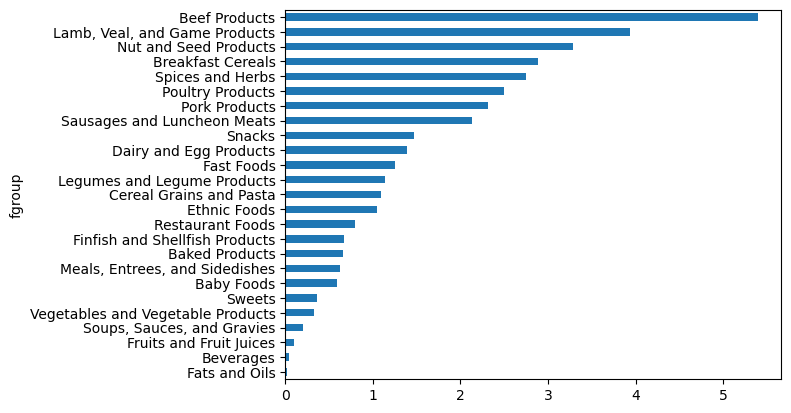

In [364]:
#根据食物组和营养类型制作一个中位数图：

result = ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)
result
# nutrient          fgroup                           
# Adjusted Protein  Sweets                               12.900
#                   Vegetables and Vegetable Products     2.180
# Alanine           Baby Foods                            0.085
#                   Baked Products                        0.248
#                   Beef Products                         1.550
#                                                         ...  
# Zinc, Zn          Snacks                                1.470
#                   Soups, Sauces, and Gravies            0.200
#                   Spices and Herbs                      2.750
#                   Sweets                                0.360
#                   Vegetables and Vegetable Products     0.330
# Name: value, Length: 2246, dtype: float64

result['Zinc, Zn'].sort_values().plot(kind = 'barh')
#title: Median zinc values by food group

In [365]:
#可以发现食物在每个营养元素下有最密集的营养：

by_nutrient = ndata.groupby(['nutgroup','nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]
max_foods.food = max_foods.food.str[:50]                                  #使food小一点

#因为产生的data frame有点太大而无法在书中显示。只有'Amino Acids'营养组，
max_foods.loc['Amino Acids']['food']
# Alanine                          Gelatins, dry powder, unsweetened
# Arginine                              Seeds, sesame flour, low-fat
# Aspartic acid                                  Soy protein isolate
# Cystine               Seeds, cottonseed flour, low fat (glandless)
# Glutamic acid                                  Soy protein isolate
#                                        ...                        
# Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
# Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
# Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
# Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
# Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
# Name: food, Length: 19, dtype: object

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

## 14.5 2012年联邦选举委员会数据库 2012 Federal Election Commission Database

In [366]:
fec = pd.read_csv('C:/Users/miran/lpthw/P00000001-ALL.csv')
fec.info()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 1001731 entries, 0 to 1001730
# Data columns (total 16 columns):
#  #   Column             Non-Null Count    Dtype  
# ---  ------             --------------    -----  
#  0   cmte_id            1001731 non-null  object 
#  1   cand_id            1001731 non-null  object 
#  2   cand_nm            1001731 non-null  object 
#  3   contbr_nm          1001731 non-null  object 
#  4   contbr_city        1001712 non-null  object 
#  5   contbr_st          1001727 non-null  object 
#  6   contbr_zip         1001620 non-null  object 
#  7   contbr_employer    988002 non-null   object 
#  8   contbr_occupation  993301 non-null   object 
#  9   contb_receipt_amt  1001731 non-null  float64
#  10  contb_receipt_dt   1001731 non-null  object 
#  11  receipt_desc       14166 non-null    object 
#  12  memo_cd            92482 non-null    object 
#  13  memo_text          97770 non-null    object 
#  14  form_tp            1001731 non-null  object 
#  15  file_num           1001731 non-null  int64  
# dtypes: float64(1), int64(1), object(14)
# memory usage: 122.3+ MB

C:\Users\miran\AppData\Local\Temp\ipykernel_6848\735885249.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec = pd.read_csv('C:/Users/miran/lpthw/P00000001-ALL.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [367]:
#data frame的一条样本记录如下：
fec.iloc[123456]
# cmte_id             C00431445
# cand_id             P80003338
# cand_nm         Obama, Barack
# contbr_nm         ELLMAN, IRA
# contbr_city             TEMPE
#                     ...      
# receipt_desc              NaN
# memo_cd                   NaN
# memo_text                 NaN
# form_tp                 SA17A
# file_num               772372
# Name: 123456, Length: 16, dtype: object

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

In [368]:
#切片切块这些数据，以提取有关捐助这和竞选捐助模式的统计信息。此处展示一些不同的分析。
#看到数据中没有政党背景，加入这些数据很有用。可以使用unique获得所有不同的政治候选人名单。

unique_cands = fec.cand_nm.unique()
unique_cands
# array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
#        "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
#        'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
#        'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
#        'Huntsman, Jon', 'Perry, Rick'], dtype=object)
unique_cands[2]
#'Obama, Barack'

#表示政党背景之一是使用相应的字典：
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

#在Series对象上使用map方法，和上述的映射关系，可以从候选人姓名中计算出政党的数组：
fec.cand_nm[123456:123461]
# 123456    Obama, Barack
# 123457    Obama, Barack
# 123458    Obama, Barack
# 123459    Obama, Barack
# 123460    Obama, Barack
# Name: cand_nm, dtype: object

fec.cand_nm[123456:123461].map(parties)
# 123456    Democrat
# 123457    Democrat
# 123458    Democrat
# 123459    Democrat
# 123460    Democrat
# Name: cand_nm, dtype: object



123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [369]:
#将它作为一列加入
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()
# Democrat      593746
# Republican    407985
# Name: party, dtype: int64

#有一些数据准备的要点。这些数据既包括捐款也包括退款（即负贡献金额）：
(fec.contb_receipt_amt > 0).value_counts()
# True     991475
# False     10256
# Name: contb_receipt_amt, dtype: int64

#为了简化分析，将分析范围限制在正向贡献中：
fec = fec[fec.contb_receipt_amt > 0]

#由于Barack Obama和Mitt Romney是主要的两位候选人，还将准备一个仅对他们竞选有贡献的子集。
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]


### 14.5.1 按职业和雇主的捐献统计 Donation Statistics by Occupation and Employer

In [370]:
#获得按职业的捐献总数是很简单的：
fec.contbr_occupation.value_counts()[:10]
# RETIRED                                   233990
# INFORMATION REQUESTED                      35107
# ATTORNEY                                   34286
# HOMEMAKER                                  29931
# PHYSICIAN                                  23432
# INFORMATION REQUESTED PER BEST EFFORTS     21138
# ENGINEER                                   14334
# TEACHER                                    13990
# CONSULTANT                                 13273
# PROFESSOR                                  12555
# Name: contbr_occupation, dtype: int64



RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [371]:
#通过查看职业，会注意到很多捐款人都有相同的基础工作类型，或者对于同一件事情有多个变量。
#将一种工作匹配到另一种来清理工作种类。
#dict.get存在一种陷阱，允许没有映射的职业通过。
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)


In [372]:
#对雇主字段做同样的事：
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

<Axes: title={'center': 'Total donations by party for top occupations'}, ylabel='contbr_occupation'>

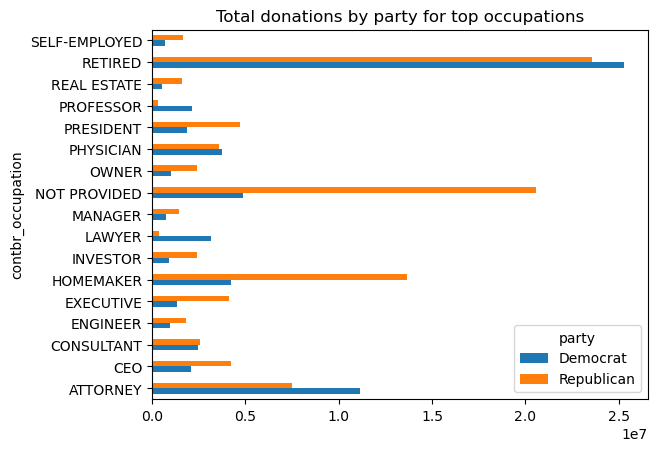

In [373]:
#现在，使用pivot table按党派和职业聚合数据，过滤出至少捐赠200万美元的子集：
by_occupation = fec.pivot_table("contb_receipt_amt",
                                 index="contbr_occupation",
                                 columns="party", aggfunc="sum")

over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]

over_2mm
# party	Democrat	Republican
# contbr_occupation		
# ATTORNEY	11141982.97	7477194.43
# CEO	2074974.79	4211040.52
# CONSULTANT	2459912.71	2544725.45
# ENGINEER	951525.55	1818373.70
# EXECUTIVE	1355161.05	4138850.09
# ...	...	...
# PRESIDENT	1878509.95	4720923.76
# PROFESSOR	2165071.08	296702.73
# REAL ESTATE	528902.09	1625902.25
# RETIRED	25305116.38	23561244.49
# SELF-EMPLOYED	672393.40	1640252.54
# 17 rows × 2 columns

over_2mm.plot(kind = 'barh', title = 'Total donations by party for top occupations')
#over_2mm.title("usa.gov sample data time zone top counts")               #? why not



In [374]:
#捐赠给Obama和Romney的顶级捐赠者的职业或公司感兴趣，可以按候选人名称分组，使用top方法变体：

def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

grouped= fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n = 7)
# cand_nm        contbr_occupation    
# Obama, Barack  RETIRED                  25305116.38
#                ATTORNEY                 11141982.97
#                INFORMATION REQUESTED     4866973.96
#                HOMEMAKER                 4248875.80
#                PHYSICIAN                 3735124.94
#                                            ...     
# Romney, Mitt   HOMEMAKER                 8147446.22
#                ATTORNEY                  5364718.82
#                PRESIDENT                 2491244.89
#                EXECUTIVE                 2300947.03
#                C.E.O.                    1968386.11
# Name: contb_receipt_amt, Length: 14, dtype: float64

grouped.apply(get_top_amounts, 'contbr_employer', n = 10)
# cand_nm        contbr_employer      
# Obama, Barack  RETIRED                  22694358.85
#                SELF-EMPLOYED            17080985.96
#                NOT EMPLOYED              8586308.70
#                INFORMATION REQUESTED     5053480.37
#                HOMEMAKER                 2605408.54
#                                            ...     
# Romney, Mitt   CREDIT SUISSE              281150.00
#                MORGAN STANLEY             267266.00
#                GOLDMAN SACH & CO.         238250.00
#                BARCLAYS CAPITAL           162750.00
#                H.I.G. CAPITAL             139500.00
# Name: contb_receipt_amt, Length: 20, dtype: float64

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

### 14.5.2 捐献金额分桶 Bucketing Donation Amounts

In [375]:
#分析数据的有用的方法，是使用cut函数，将贡献者的数量，按贡献大小离散化分桶：
bins = np.array([0, 1, 10, 100, 1000, 10000, 
                100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels
# 411         (10, 100]
# 412       (100, 1000]
# 413       (100, 1000]
# 414         (10, 100]
# 415         (10, 100]
#              ...     
# 701381      (10, 100]
# 701382    (100, 1000]
# 701383        (1, 10]
# 701384      (10, 100]
# 701385    (100, 1000]
# Name: contb_receipt_amt, Length: 694282, dtype: category
# Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [376]:
#将Obama和Romney的数据按名称和分类标签进行分组，以获得捐赠规模的直方图。

grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)
# cand_nm	Obama, Barack	Romney, Mitt
# contb_receipt_amt		
# (0, 1]	493	77
# (1, 10]	40070	3681
# (10, 100]	372280	31853
# (100, 1000]	153991	43357
# (1000, 10000]	22284	26186
# (10000, 100000]	2	1
# (100000, 1000000]	3	0
# (1000000, 10000000]	4	0

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


<Axes: title={'center': 'Percentage of total donations received by candidates for each donation size'}, ylabel='contb_receipt_amt'>

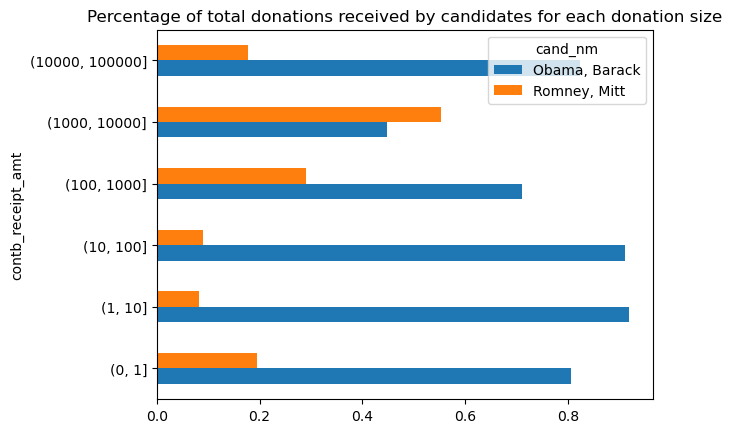

In [377]:
#Obama获得的捐款数量比Romney大得多。可以对捐款数额进行求和并在桶内归一化，以便对候选人划分的捐款总额百分比可视化。

bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis = 1), axis = 0)
normed_sums
# cand_nm	Obama, Barack	Romney, Mitt
# contb_receipt_amt		
# (0, 1]	0.805182	0.194818
# (1, 10]	0.918767	0.081233
# (10, 100]	0.910769	0.089231
# (100, 1000]	0.710176	0.289824
# (1000, 10000]	0.447326	0.552674
# (10000, 100000]	0.823120	0.176880
# (100000, 1000000]	1.000000	0.000000
# (1000000, 10000000]	1.000000	0.000000

normed_sums[:-2].plot(kind = 'barh', title = 'Percentage of total donations received by candidates for each donation size')
#排除两个最大的箱体，因为这些箱体不是由个人捐赠的。
#还可以通过捐助者姓名和邮政编码聚合捐款，以便为那些很多次小额捐献的人进行调整，他们不会进行大型捐赠。

### 14.5.3 按州进行捐赠统计 Donation Statistics by State

In [378]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]
# cand_nm	Obama, Barack	Romney, Mitt
# contbr_st		
# AK	281840.15	86204.24
# AL	543123.48	527303.51
# AR	359247.28	105556.00
# AZ	1506476.98	1888436.23
# CA	23824984.24	11237636.60
# CO	2132429.49	1506714.12
# CT	2068291.26	3499475.45
# DC	4373538.80	1025137.50
# DE	336669.14	82712.00
# FL	7318178.58	8338458.81

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [379]:
#将每一行除以捐款总额，就可以得到每个候选人按州的捐赠总额的相对百分比：
percent = totals.div(totals.sum(1), axis = 0)
percent[:10]
# cand_nm	Obama, Barack	Romney, Mitt
# contbr_st		
# AK	0.765778	0.234222
# AL	0.507390	0.492610
# AR	0.772902	0.227098
# AZ	0.443745	0.556255
# CA	0.679498	0.320502
# CO	0.585970	0.414030
# CT	0.371476	0.628524
# DC	0.810113	0.189887
# DE	0.802776	0.197224
# FL	0.467417	0.532583

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


## 14.6 小结 Conclusion